In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 120, 'display.max_columns', 120)
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
loan_data = pd.read_csv("loan.csv")

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Data Cleaning

In [6]:
# Getting Percentage of null values from all the columns
nullPercent_columns = loan_data.isnull().sum()*100/len(loan_data)
nullValue_df = pd.DataFrame({'column': loan_data.columns, 
                            'nullPercent': nullPercent_columns.round()})
nullValue_df.sort_values('nullPercent', inplace=True)

In [7]:
nullValues_columns = nullValue_df[(nullValue_df['nullPercent'] == 100.00)]['column'].tolist()

In [8]:
# Droping the columns that have 100 percent null values
nullColumns_droppedData = loan_data.drop(nullValues_columns, axis=1)

### Let us find if there are any columns with all the unique values


In [9]:
uniqueValue_columns = nullColumns_droppedData.nunique()

In [10]:
uniqueValue_columns[uniqueValue_columns.values==len(nullColumns_droppedData)]

id           39717
member_id    39717
url          39717
dtype: int64

In [11]:
nullColumns_droppedData = nullColumns_droppedData.drop(['id', 'member_id', 'url'], axis=1)

### Let us find if there are any columns with all the same values


In [12]:
uniqueValue_columns[uniqueValue_columns.values==1]

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [13]:
nullColumns_droppedData = nullColumns_droppedData.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis=1)

### Remove other columns that have lots of null values

In [14]:
nullValue_df[(nullValue_df['nullPercent']>10) & (nullValue_df['nullPercent']<100)]

,column,nullPercent
desc,desc,33.0
mths_since_last_delinq,mths_since_last_delinq,65.0
mths_since_last_record,mths_since_last_record,93.0
next_pymnt_d,next_pymnt_d,97.0


In [15]:
nullColumns_droppedData = nullColumns_droppedData.drop(['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1)

In [16]:
# Deleting string columns having most of as unique values
nullColumns_droppedData = nullColumns_droppedData.drop(['emp_title'], axis=1)

In [17]:
nullColumns_droppedData.shape

(39717, 40)

In [18]:
#Removing the data that have Current category under the "loan_status" column
nullColumns_droppedData = nullColumns_droppedData[~(nullColumns_droppedData['loan_status']=="Current")]

In [19]:
#Removing the columns value that have same data in all the rows.
nullColumns_droppedData = nullColumns_droppedData.loc[:,nullColumns_droppedData.nunique()!=1]

### Creating Derived Columns

In [20]:
nullColumns_droppedData['int_rate_percentage'] = nullColumns_droppedData['int_rate'].str.rstrip('%')
del nullColumns_droppedData['int_rate']
nullColumns_droppedData['term_months'] = nullColumns_droppedData['term'].str.rstrip('months')
del nullColumns_droppedData['term']

nullColumns_droppedData['emp_length_years'] = nullColumns_droppedData['emp_length'].str.rstrip('years ')
nullColumns_droppedData['emp_length_years'].replace({'10+': '10'}, inplace=True)
nullColumns_droppedData['emp_length_years'][nullColumns_droppedData['emp_length_years'] == '< 1'] = '0.5'
del nullColumns_droppedData['emp_length']

nullColumns_droppedData['revol_util_percentage'] = nullColumns_droppedData['revol_util'].str.rstrip('%')
del nullColumns_droppedData['revol_util']


nullColumns_droppedData[['issue_d_month','issue_d_year']] = nullColumns_droppedData['issue_d'].str.split('-', 1, expand=True)
nullColumns_droppedData[['last_credit_pull_d_month','last_credit_pull_d_year']] = nullColumns_droppedData['last_credit_pull_d'].str.split('-', 1, expand=True)
nullColumns_droppedData[['last_pymnt_d_month','last_pymnt_d_year']] = nullColumns_droppedData['last_pymnt_d'].str.split('-', 1, expand=True)
nullColumns_droppedData[['earliest_cr_line_month','earliest_cr_line_year']] = nullColumns_droppedData['earliest_cr_line'].str.split('-', 1, expand=True)
nullColumns_droppedData['issue_d_year'] = '20' + nullColumns_droppedData['issue_d_year']

In [21]:
nullColumns_droppedData.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_percentage,term_months,emp_length_years,revol_util_percentage,issue_d_month,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year
0,5000,5000,4975.0,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,10.65,36,10,83.70,Dec,2011,May,16,Jan,15,Jan,85
1,2500,2500,2500.0,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,15.27,60,0.5,9.40,Dec,2011,Sep,13,Apr,13,Apr,99
2,2400,2400,2400.0,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,15.96,36,10,98.50,Dec,2011,May,16,Jun,14,Nov,01
3,10000,10000,10000.0,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,13.49,36,10,21,Dec,2011,Apr,16,Jan,15,Feb,96
5,5000,5000,5000.0,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,7.90,36,3,28.30,Dec,2011,Jan,16,Jan,15,Nov,04


In [22]:
nullColumns_droppedData['PnL']=(
    nullColumns_droppedData['total_pymnt'].astype(float)-nullColumns_droppedData['funded_amnt'].astype(float)
)*100/nullColumns_droppedData['funded_amnt'].astype(float)

In [23]:
nullColumns_droppedData['loan_inc_ratio'] = nullColumns_droppedData['funded_amnt'].astype(float)*100/nullColumns_droppedData['annual_inc'].astype(float)

In [24]:
nullColumns_droppedData['annual_inc_thousand'] = nullColumns_droppedData['annual_inc'].astype(float) / 1000

# Missing Value Imputation

### Updated column datatype

In [25]:
float_columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti', 
          'revol_bal', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage', 'revol_util_percentage']
nullColumns_droppedData[float_columns] = nullColumns_droppedData[float_columns].astype(float)

In [26]:
int_columns = ['total_acc', 'term_months', 'issue_d_year']
nullColumns_droppedData[int_columns] = nullColumns_droppedData[int_columns].astype(int)

In [27]:
category_columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
nullColumns_droppedData[category_columns] = nullColumns_droppedData[category_columns].apply(lambda x: x.astype('category'))

In [28]:
# Replacing the null values with Median 
for column in float_columns:
    nullColumns_droppedData[column].fillna(nullColumns_droppedData[column].median(), inplace=True)

In [29]:
# Replacing the null values with Median 
for column in int_columns:
    nullColumns_droppedData[column].fillna(nullColumns_droppedData[column].median(), inplace=True)

In [30]:
# Replacing the null values with Mode, Because of categorical data 
for column in category_columns:
    nullColumns_droppedData[column].fillna(nullColumns_droppedData[column].mode()[0], inplace=True)

In [31]:
# Final dataset for EDA(Exploratory Data Analytics)
df = nullColumns_droppedData

## Correlation

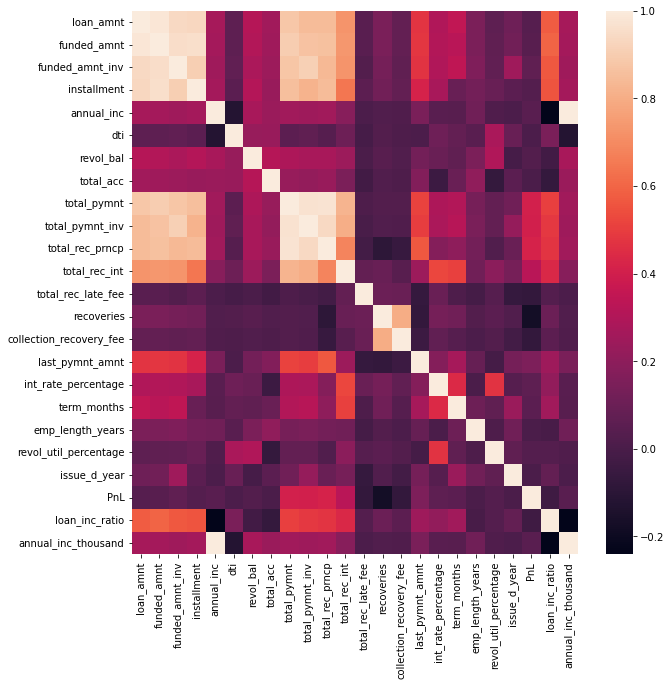

In [32]:
# Correlation between all the columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

# Exploratory Data Analytics

### Univariate Analysis

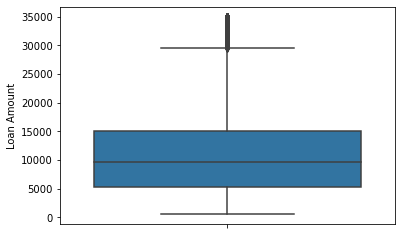

In [33]:
# display loan_amnt column by boxplot
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

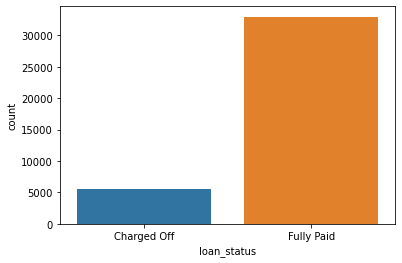

In [34]:
# display loan_status column by countplot
sns.countplot(x=df["loan_status"])
plt.show()

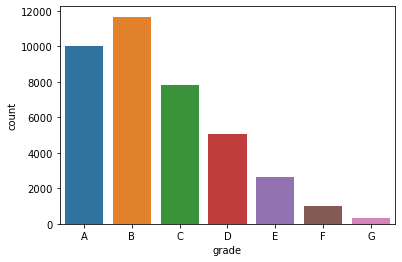

In [35]:
# display grade column by countplot
sns.countplot(x='grade', data=df)
plt.show()

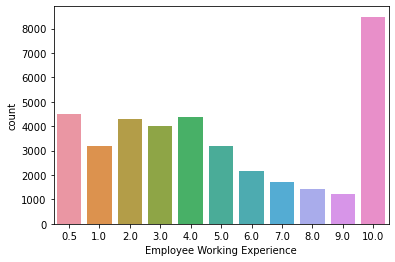

In [36]:
# display emp_length_years column by countplot
sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

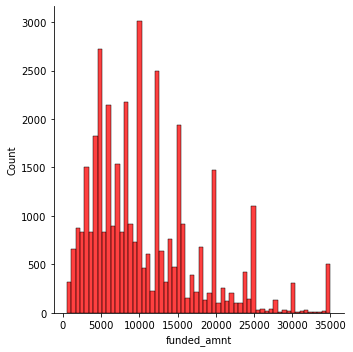

In [37]:
# display funded_amnt column by displot
sns.displot(df['funded_amnt'], color="red")
plt.show()

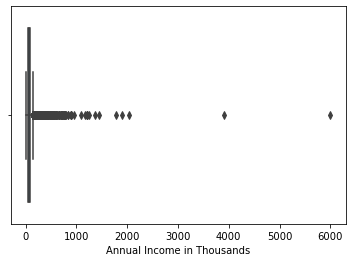

In [38]:
# display annual_inc_thousand column by boxplot
sns.boxplot(x=df['annual_inc_thousand'])
plt.xlabel('Annual Income in Thousands')
plt.show()

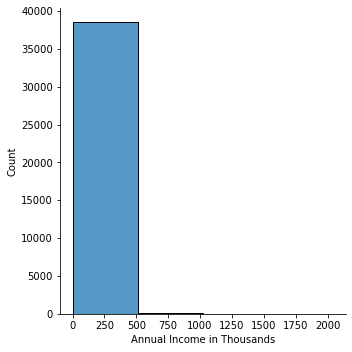

In [39]:
# display annual_inc_thousand column by displot
sns.displot(df[df['annual_inc_thousand'] < 3000]['annual_inc_thousand'], bins=4)
plt.xlabel('Annual Income in Thousands')
plt.show()

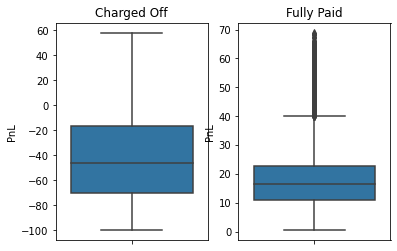

In [40]:
plt.subplot(1,2,1)
plt.title('Charged Off')
sns.boxplot(y=df[df.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].PnL)
plt.show()

# Segmented Univariate Analysis

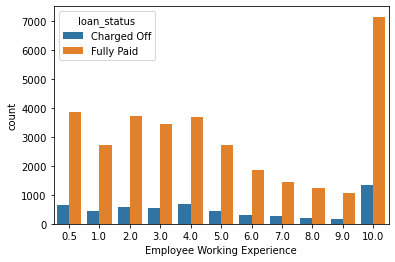

In [41]:
# visualization of emp_length_years with loan_status columns by countplotplot
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

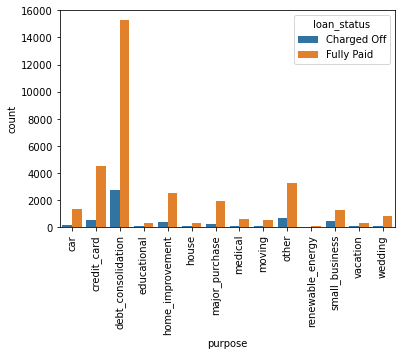

In [42]:
# visualization of purpose with loan_status columns by countplot
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

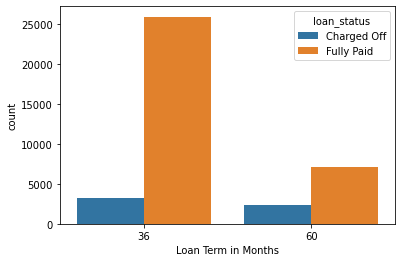

In [43]:
# visualization of term_months with loan_status columns by countplot
sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

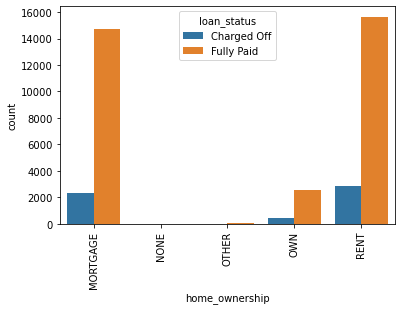

In [44]:
# visualization of home_ownership with loan_status columns by countplot
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis

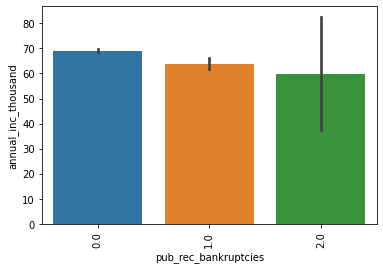

In [45]:
# Relationship of annual_inc_thousand with pub_rec_bankruptcies columns by barplot
sns.barplot(y='annual_inc_thousand', x='pub_rec_bankruptcies', data=df)
plt.xticks(rotation=90)
plt.show()

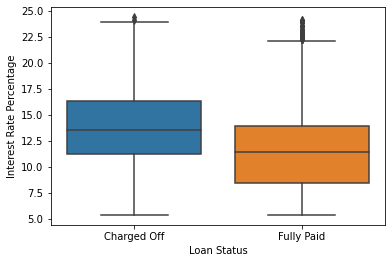

In [46]:
# Relationship of int_rate_percentage with loan_status columns by boxplot
sns.boxplot(y='int_rate_percentage', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

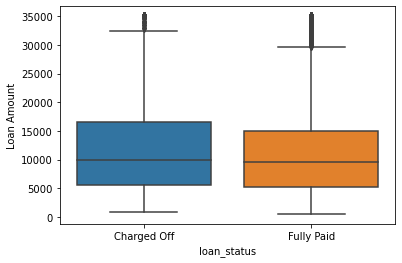

In [47]:
# Relationship of loan_amnt with loan_status columns by boxplot
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Loan Amount')
plt.show()

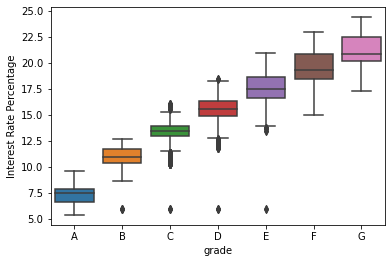

In [48]:
# Relationship of int_rate_percentage with grade columns by boxplot
sns.boxplot(y='int_rate_percentage', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

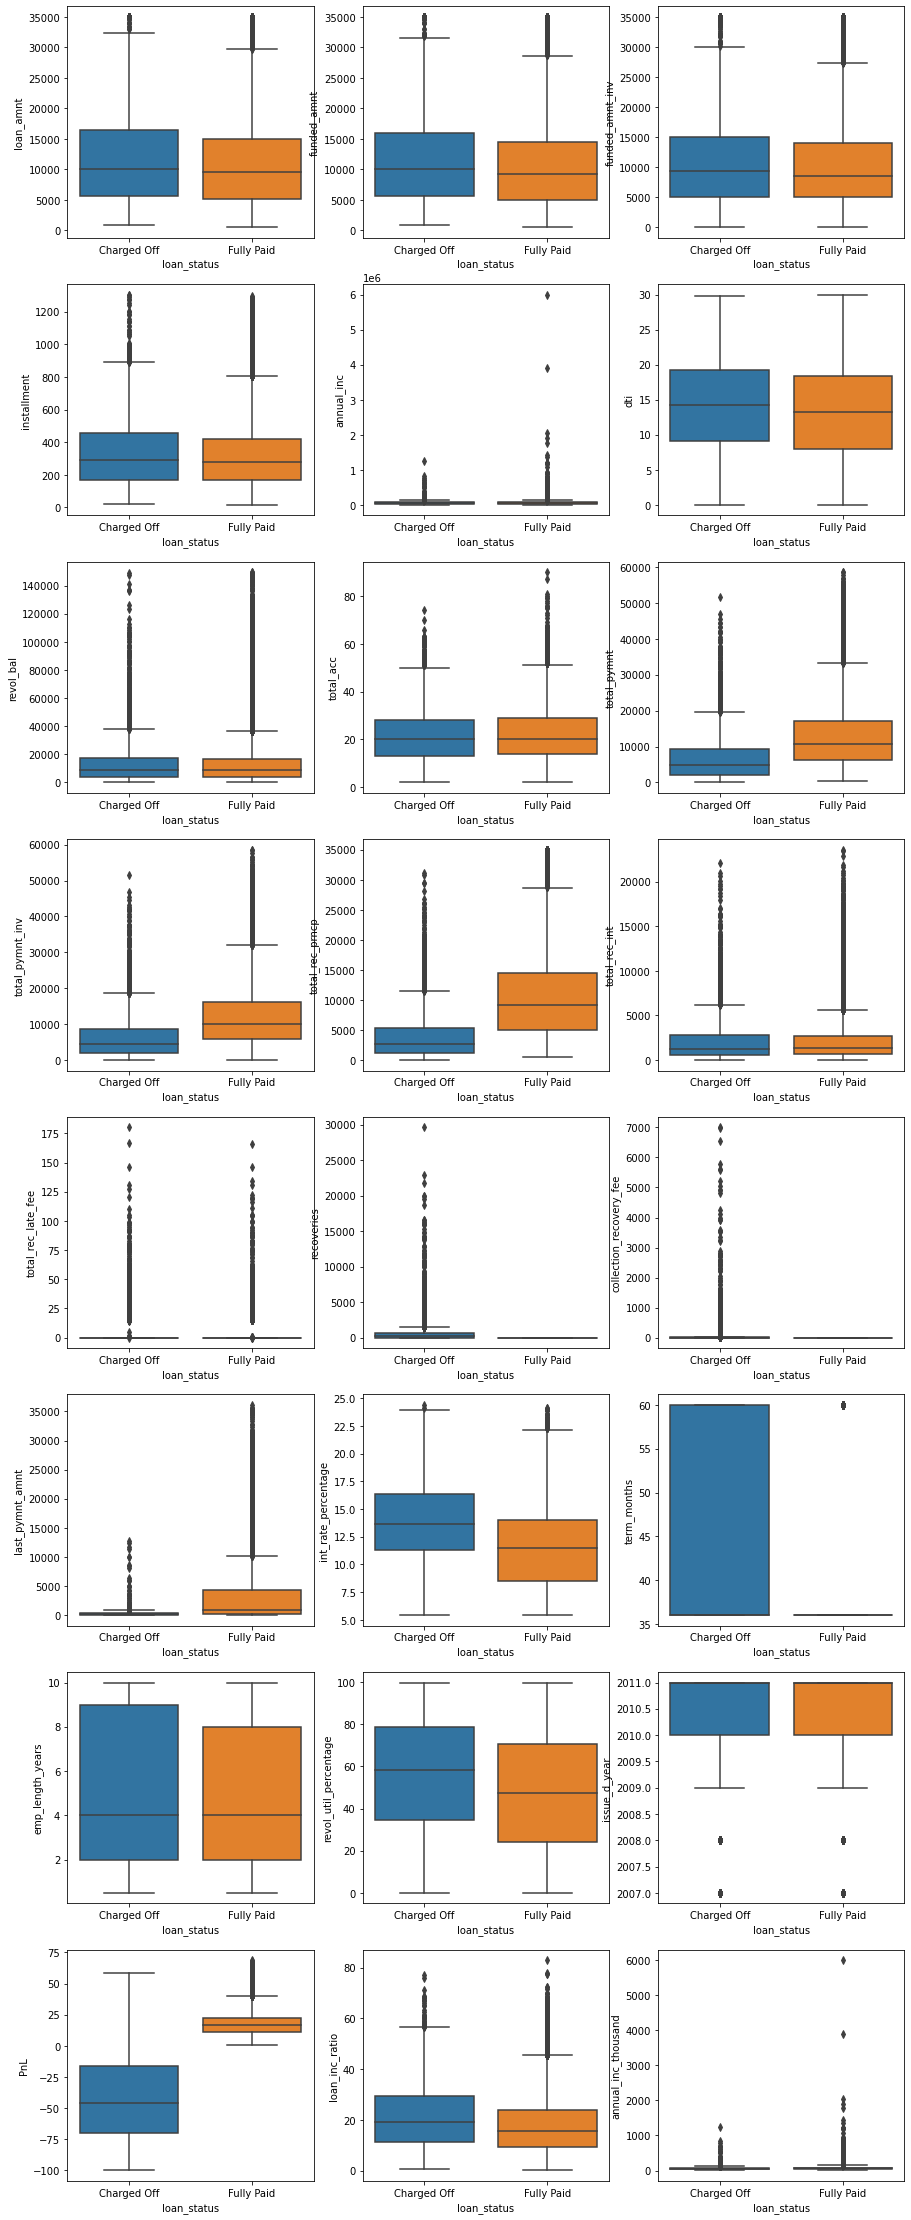

In [49]:
# Relationship of all the columns with loan_status column by boxplot
numeric_data = df.select_dtypes(include = [np.number])
plt.figure(figsize=(15,40))


for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=df)

plt.show()

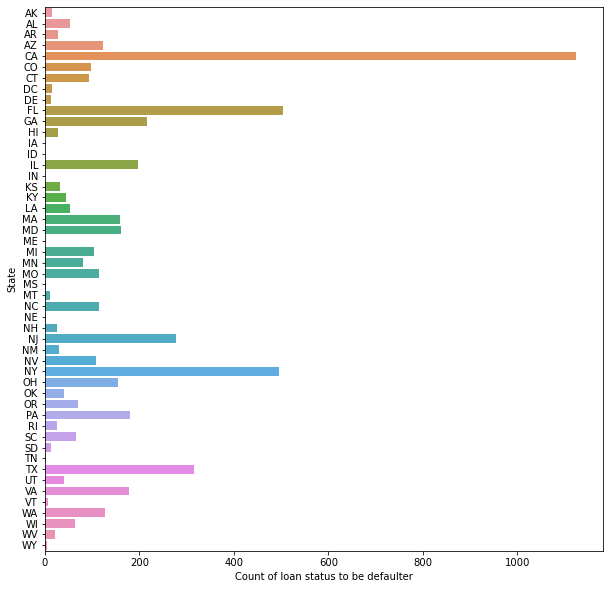

In [50]:
# Relationship of addr_state with loan_status columns by barplot
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

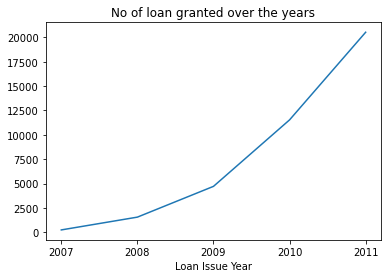

In [51]:
# Relationship of issue_d_year with loan_status columns by line
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

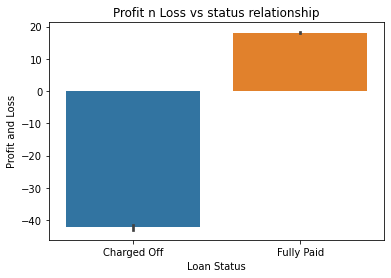

In [52]:
# Relationship of loan_status with PnL columns by barplot
sns.barplot(x='loan_status',y='PnL',data=df)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

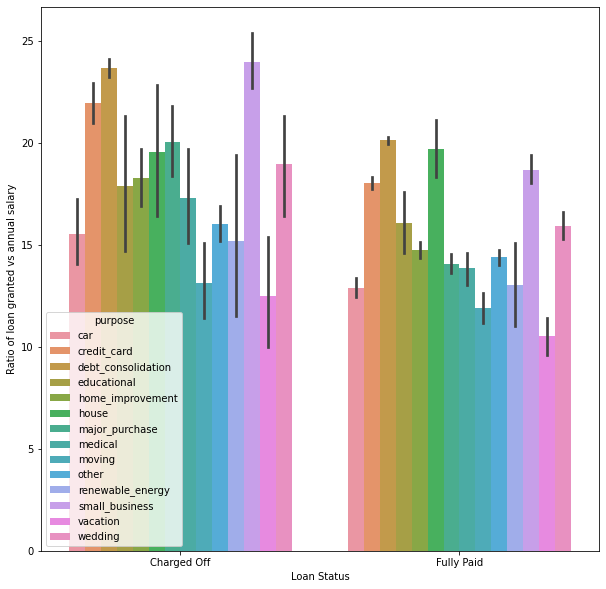

In [53]:
# Relationship of loan_status with loan_inc_ratio columns by barplot
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

In [54]:
df_agg = df[df['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

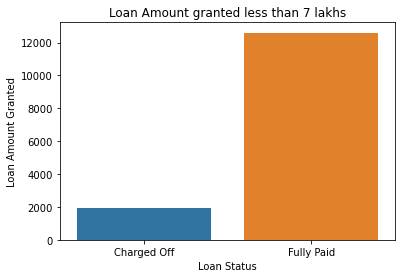

In [55]:
# Loan amount granted less than 7 lakhs
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [56]:
df_agg = df[df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

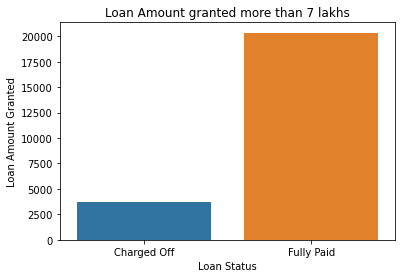

In [57]:
# Loan amount granted more than 7 lakhs
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()